# Import Library

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import classification_report
import nltk

nltk.download('punkt')
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline
from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Data/Sentimen YT.xlsx')
df

,publishedAt,authorDisplayName,textDisplay,likeCount
0,2025-04-25T00:31:25Z,@Soppo-kp1sp,TOLONG YA PAK PRABOWO.... DPR..... YANG BENER ...,0
1,2025-04-23T13:04:27Z,@__-wt8qk,Revisi terbaru UU TNI menuai kritik tajam kare...,1
2,2025-04-19T16:00:05Z,@irmanamonk6085,"Materinya sangat dapat dipahami, tapi kenapa m...",0
3,2025-04-16T09:20:49Z,@setyawandanurwendha5383,TNI hars berinovasai bikin super soldier seper...,0
4,2025-04-12T02:23:06Z,@Baharichanel121,Tidak ada Dwi Pungsi kembali Pemerintahan sipi...,0
...,...,...,...,...
1396,2025-03-23T08:32:50Z,@cillockcube,@@Payday5sebutkan apa bagusnya anies? Klau ngo...,0
1397,2025-03-23T08:37:09Z,@Payday5,@@cillockcube gua tanya balik bagusnya prabowo...,1
1398,2025-03-23T08:45:31Z,@cillockcube,"@ milih pemimpin ga cuma dri janji2 kampanye, ...",0
1399,2025-03-23T07:05:36Z,@farizandrojuventino24,mampir,0


# Cleaning Data

In [ ]:
df

,publishedAt,authorDisplayName,textDisplay,likeCount
0,2025-04-25T00:31:25Z,@Soppo-kp1sp,TOLONG YA PAK PRABOWO.... DPR..... YANG BENER ...,0
1,2025-04-23T13:04:27Z,@__-wt8qk,Revisi terbaru UU TNI menuai kritik tajam kare...,1
2,2025-04-19T16:00:05Z,@irmanamonk6085,"Materinya sangat dapat dipahami, tapi kenapa m...",0
3,2025-04-16T09:20:49Z,@setyawandanurwendha5383,TNI hars berinovasai bikin super soldier seper...,0
4,2025-04-12T02:23:06Z,@Baharichanel121,Tidak ada Dwi Pungsi kembali Pemerintahan sipi...,0
...,...,...,...,...
1396,2025-03-23T08:32:50Z,@cillockcube,@@Payday5sebutkan apa bagusnya anies? Klau ngo...,0
1397,2025-03-23T08:37:09Z,@Payday5,@@cillockcube gua tanya balik bagusnya prabowo...,1
1398,2025-03-23T08:45:31Z,@cillockcube,"@ milih pemimpin ga cuma dri janji2 kampanye, ...",0
1399,2025-03-23T07:05:36Z,@farizandrojuventino24,mampir,0


In [ ]:
df = df[['authorDisplayName', 'textDisplay', 'likeCount']]

In [ ]:
df['textDisplay'] = df['textDisplay'].replace('false', pd.NA)  # Mengganti 'false' dengan pd.NA (Not Available)
df = df.dropna(subset=['textDisplay'])

<ipython-input-41-e551199d3dbd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['textDisplay'] = df['textDisplay'].replace('false', pd.NA)  # Mengganti 'false' dengan pd.NA (Not Available)


In [ ]:
df.shape

(1401, 3)

In [ ]:
df = df.drop_duplicates(subset=['textDisplay'])

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

,0
authorDisplayName,0
textDisplay,0
likeCount,0


In [ ]:
def clean_twitter_text(text):
    # Menghapus URL
    text = re.sub(r'http\S+', '', text)
    # Menghapus username
    text = re.sub(r'@\w+', '', text)
    # Menghapus hashtag
    text = re.sub(r'#\w+', '', text)
    # Menghapus tanda baca dan angka
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    # Menghapus spasi yang berlebihan
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'br', ' ',text).strip()
    text = re.sub(r'quot', ' ',text).strip()

    return text

df['textDisplay'] = df['textDisplay'].apply(clean_twitter_text)

In [ ]:
df

,authorDisplayName,textDisplay,likeCount
0,@Soppo-kp1sp,TOLONG YA PAK PRABOWO DPR YANG BENER donkkkk J...,0
1,@__-wt8qk,Revisi terbaru UU TNI menuai kritik tajam kare...,1
2,@irmanamonk6085,Materinya sangat dapat dipahami tapi kenapa mb...,0
3,@setyawandanurwendha5383,TNI hars berinovasai bikin super soldier seper...,0
4,@Baharichanel121,Tidak ada Dwi Pungsi kembali Pemerintahan sipi...,0
...,...,...,...
1396,@cillockcube,apa bagusnya anies Klau ngomong ga pernah tu t...,0
1397,@Payday5,gua tanya balik bagusnya prabowo apa Orba bali...,1
1398,@cillockcube,milih pemimpin ga cuma dri janji kampanye tpi ...,0
1399,@farizandrojuventino24,mampir,0


In [ ]:
df.drop_duplicates(subset="textDisplay", keep='first', inplace = True)
df

,authorDisplayName,textDisplay,likeCount
0,@Soppo-kp1sp,TOLONG YA PAK PRABOWO DPR YANG BENER donkkkk J...,0
1,@__-wt8qk,Revisi terbaru UU TNI menuai kritik tajam kare...,1
2,@irmanamonk6085,Materinya sangat dapat dipahami tapi kenapa mb...,0
3,@setyawandanurwendha5383,TNI hars berinovasai bikin super soldier seper...,0
4,@Baharichanel121,Tidak ada Dwi Pungsi kembali Pemerintahan sipi...,0
...,...,...,...
1396,@cillockcube,apa bagusnya anies Klau ngomong ga pernah tu t...,0
1397,@Payday5,gua tanya balik bagusnya prabowo apa Orba bali...,1
1398,@cillockcube,milih pemimpin ga cuma dri janji kampanye tpi ...,0
1399,@farizandrojuventino24,mampir,0


# Preprocessing Data

## Case folding

In [ ]:
def case_folding(text):
  return text.lower()

df['textDisplay'] = df['textDisplay'].apply(case_folding)
df

,authorDisplayName,textDisplay,likeCount
0,@Soppo-kp1sp,tolong ya pak prabowo dpr yang bener donkkkk j...,0
1,@__-wt8qk,revisi terbaru uu tni menuai kritik tajam kare...,1
2,@irmanamonk6085,materinya sangat dapat dipahami tapi kenapa mb...,0
3,@setyawandanurwendha5383,tni hars berinovasai bikin super soldier seper...,0
4,@Baharichanel121,tidak ada dwi pungsi kembali pemerintahan sipi...,0
...,...,...,...
1396,@cillockcube,apa bagusnya anies klau ngomong ga pernah tu t...,0
1397,@Payday5,gua tanya balik bagusnya prabowo apa orba bali...,1
1398,@cillockcube,milih pemimpin ga cuma dri janji kampanye tpi ...,0
1399,@farizandrojuventino24,mampir,0


## Normalize

In [ ]:
norm = { "dgn":"dengan","mpr":"majelis permusyawaratan rakyat","permpasan" :"perampasan", "hrs":"harus", "bgtu":"begitu","kyk":"kaya","dlu":"dulu", "mk":"mahkamah konstitusi", "mrk":"mereka", "mgp":"menganggap",
        "nkri":"negara kesatuan republik indonesia", "byk" : "banyak", "brp" : "berapa", "dwipungsi":"dwi fungsi","dwi pungsi":"dwifungsi", "skrg":"sekarang", "derama":"drama", "koropsi":"korupsi","wowo":"prabowo subianto", "hars" : "harus", "repormasi":"reformasi",
        "dirut":"direktur utama", "irjen":"Inspektur Jenderal", "mayjen":"mayor jenderal", "letkol":"letnan kolonel", "knp": "kenapa", "mngp": "mengapa", "bbrp": "beberapa", "tsb": "tersebut","lg": "lagi", "pake": "pakai", "org": "orang", "wong": "orang",
        "adl": "adalah","mmg": "memang","emang":"memang","emg":"memang", "spt": "seperti","spy": "supaya","ketum": "ketua umum", "menhan": "menteri pertahanan","dpr":"dewan perwakilan rakyat","klo": "kalau","kalo": "kalau","klu": "kalau","klau":"kalau", "bnyk": "banyak","byk": "banyak",
        "knp": "kenapa","mngp": "mengapa","mngapa": "mengapa","bbrp": "beberapa","bakal": "akan","bakalan": "akan","bnr": "benar", "bener": "benar", "skrg": "sekarang","skrng": "sekarang","msh": "masih","bhw": "bahwa","gimana": "bagaimana","dmn": "dimana","dlm": "dalam",
        "duid": "uang","duit": "uang", "nyari": "cari", "naek": "naik","mau": "ingin","sdh": "sudah","udh": "sudah","jkt": "jakarta","jateng": "jawa tengah","jatim": "jawa timur", "jabar": "jawa barat","jdi": "jadi", "jd": "jadi","sbg": "sebagai","sbgi": "sebagai",
        "scr": "secara","sampe": "sampai","sprt" : "seperti","sperti":"seperti","trs": "terus","trus": "terus","ttp": "tetap","tapi": "tetapi","dkk": "dan kawan kawan","dll": "dan lain lain","dsb": "dan sebagainya","dst": "dan seterusnya", "krn": "karena",
        "krna": "karena", "yg": "yang", "pdhl": "padahal","aq":"saya","bgt": "banget","iy": "iya", "bkn": "bukan","blm": "belum","tak": "tidak","enggak": "tidak","nggak": "tidak","gak": "tidak","tdk": "tidak","jgn": "jangan","ama": "sama","drpd": "daripada",
        "dri": "dari","bsa": "dapat","bisa": "dapat","dpt": "dapat","cuma": "hanya","cuman": "hanya","cma": "hanya","blh": "boleh","shga": "sehingga", "tsb": "tersebut","thdp": "terhadap","liat": "lihat", "survey": "survei","lbh": "lebih","donkkkk":"dong","dongggg": "dong","maslaah":"masalah","orba":"orde baru",
        "mensahkan":"mengesahkan","lenserkan":"lengserkan","lajnnya": "lainnya"
}
def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['textDisplay'] = df['textDisplay'].apply(lambda x: normalisasi(x))
df

,authorDisplayName,textDisplay,likeCount
0,@Soppo-kp1sp,tolong ya pak prabowo dewan perwakilan rakyat ...,0
1,@__-wt8qk,revisi terbaru uu tni menuai kritik tajam kare...,1
2,@irmanamonk6085,materinya sangat dapat dipahami tetapi kenapa ...,0
3,@setyawandanurwendha5383,tni harus berinovasai bikin super soldier sepe...,0
4,@Baharichanel121,tidak ada dwifungsi kembali pemerintahan sipil...,0
...,...,...,...
1396,@cillockcube,apa bagusnya anies kalau ngomong ga pernah tu ...,0
1397,@Payday5,gua tanya balik bagusnya prabowo apa orde baru...,1
1398,@cillockcube,milih pemimpin ga hanya dari janji kampanye tp...,0
1399,@farizandrojuventino24,mampir,0


## Remove Stopwords

In [ ]:
!pip install Sastrawi

In [ ]:
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()
stop_words.extend(more_stop_words)

new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopword(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['textDisplay'] = df['textDisplay'].apply(lambda x: stopword(x))
df

,authorDisplayName,textDisplay,likeCount
0,@Soppo-kp1sp,ya pak prabowo dewan perwakilan rakyat benar d...,0
1,@__-wt8qk,revisi terbaru uu tni menuai kritik tajam dian...,1
2,@irmanamonk6085,materinya sangat dipahami mbak narator nya ken...,0
3,@setyawandanurwendha5383,tni berinovasai bikin super soldier captain am...,0
4,@Baharichanel121,ada dwifungsi pemerintahan sipil kaya dulu lur...,0
...,...,...,...
1396,@cillockcube,apa bagusnya anies kalau ngomong ga pernah tu ...,0
1397,@Payday5,gua tanya balik bagusnya prabowo apa orde baru...,1
1398,@cillockcube,milih pemimpin ga janji kampanye tpi lihat dar...,0
1399,@farizandrojuventino24,mampir,0


## Tokenizing

In [ ]:
tokenized = df['textDisplay'].apply(lambda x:x.split())
tokenized.to_excel("/content/drive/MyDrive/Colab Notebooks/Data/HasiltokenizingYT.xlsx", index=False)
tokenized

,textDisplay
0,"[ya, pak, prabowo, dewan, perwakilan, rakyat, ..."
1,"[revisi, terbaru, uu, tni, menuai, kritik, taj..."
2,"[materinya, sangat, dipahami, mbak, narator, n..."
3,"[tni, berinovasai, bikin, super, soldier, capt..."
4,"[ada, dwifungsi, pemerintahan, sipil, kaya, du..."
...,...
1396,"[apa, bagusnya, anies, kalau, ngomong, ga, per..."
1397,"[gua, tanya, balik, bagusnya, prabowo, apa, or..."
1398,"[milih, pemimpin, ga, janji, kampanye, tpi, li..."
1399,[mampir]


## Stemming

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  do = []
  for w in text_cleaning:
    dt = stemmer.stem(w)
    do.append(dt)
  d_clean = []
  d_clean = " ".join(do)
  print(d_clean)
  return d_clean

tokenized = tokenized.apply(stemming)

ya pak prabowo dewan wakil rakyat benar dong jangan senjata pakai hancur negara sendiri negara beli senjata pakai uang rakyat lindung rakyat bukan tindas ngeri sekali wahai seluruh rakyat indonesia nusantara ferry kawan kawan jelas banget keras tegas lugas lawan kezoliman kuasa gila kuasa mati bawa apa sih kuasa tni polri sendiri ayo donk bangkit berani gugat kalau lihat ketidakbenaran ketidakadilan kalian alami jenderal jabat petinggi jangan donk berani punya rumah mobil mewah kalau sejahtera prajurit pasu sejahtera malu donk harus kalian pimpin yang makan minum tidur enak saat orang orang bawah susah hidup abdi negara berani mati bela negara meninggalkann keluarga sejahtera keluarganyan benar anak istri tentara prajurit siap tinggal siap terima kabar mati prajurit tetapi hidup mereka tidak jamin negara
revisi baru uu tni tuai kritik tajam anggap lebih untung perwira tinggi prajurit pangkat rendah abai bijak tingkat usia pensiun jenderal bintang empat hingga tahun luas jabat sipil per

In [ ]:
tokenized.to_excel("/content/drive/MyDrive/Colab Notebooks/Data/HasilstemmingYT.xlsx", index=False)

# Labeling Data with Texblob

In [ ]:
!pip install googletrans==3.1.0a0
import googletrans
from googletrans import Translator

In [ ]:
df = pd.DataFrame(df['textDisplay'])
data = pd.DataFrame(df['textDisplay'])
translator = Translator()
translations = {}
for column in df.columns:
  #unique elements dari kolom
  unique_elements = df[column].unique()
  for element in unique_elements:
    #memasukkan terjemahan ke kamus
    translations[element] = translator.translate(element).text

#masukin hasil translate ke kolom baru
data['translated_text'] = df.replace(translations)
data['translated_text'] = data['translated_text'].str.lower()

data

,textDisplay,translated_text
0,ya pak prabowo dewan perwakilan rakyat benar d...,yes pak prabowo the house of representatives i...
1,revisi terbaru uu tni menuai kritik tajam dian...,the latest revision of the tni law drawing sha...
2,materinya sangat dipahami mbak narator nya ken...,the material is very understood by the narrato...
3,tni berinovasai bikin super soldier captain am...,tni innovates to make super soldier captain am...
4,ada dwifungsi pemerintahan sipil kaya dulu lur...,there is a dual function of the rich civilian ...
...,...,...
1396,apa bagusnya anies kalau ngomong ga pernah tu ...,what is the good thing about anies if you say ...
1397,gua tanya balik bagusnya prabowo apa orde baru...,i asked back the good thing prabowo was the ne...
1398,milih pemimpin ga janji kampanye tpi lihat dar...,choose a leader not promise the campaign but s...
1399,mampir,stop by


In [ ]:
import textblob
from textblob import TextBlob

data_tweet = list(data['translated_text'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, tweet in enumerate(data_tweet):
    analysis = TextBlob(tweet)
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append('Positif')
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append('Netral')
    else:
        total_negatif += 1
        status.append('Negatif')

    total += 1

print(f'Hasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data : {total}')
data['sentimen']=status
data

Hasil Analisis Data:
Positif = 578
Netral = 540
Negatif = 270

Total Data : 1388


,textDisplay,translated_text,sentimen
0,ya pak prabowo dewan perwakilan rakyat benar d...,yes pak prabowo the house of representatives i...,Positif
1,revisi terbaru uu tni menuai kritik tajam dian...,the latest revision of the tni law drawing sha...,Positif
2,materinya sangat dipahami mbak narator nya ken...,the material is very understood by the narrato...,Positif
3,tni berinovasai bikin super soldier captain am...,tni innovates to make super soldier captain am...,Positif
4,ada dwifungsi pemerintahan sipil kaya dulu lur...,there is a dual function of the rich civilian ...,Positif
...,...,...,...
1396,apa bagusnya anies kalau ngomong ga pernah tu ...,what is the good thing about anies if you say ...,Positif
1397,gua tanya balik bagusnya prabowo apa orde baru...,i asked back the good thing prabowo was the ne...,Positif
1398,milih pemimpin ga janji kampanye tpi lihat dar...,choose a leader not promise the campaign but s...,Positif
1399,mampir,stop by,Netral


In [ ]:
data.to_excel("/content/drive/MyDrive/Colab Notebooks/Data/HasillabelingYT.xlsx", index=False)

# Feature Selection TF IDF

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import normalize

# Memuat data
data = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Data/HasillabelingYT.xlsx")
column = 'textDisplay'

# Mengganti nilai NaN dengan string kosong
data[column] = data[column].fillna('')

# Membuat objek TfidfVectorizer terlebih dahulu to learn the vocabulary with max_features
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))

# Transformasi teks dengan TfidfVectorizer to fit and learn the vocabulary
tfs = tfidf_vectorizer.fit_transform(data[column])

# Get the vocabulary from the fitted TfidfVectorizer
vocabulary = tfidf_vectorizer.vocabulary_

# Membuat objek CountVectorizer using the vocabulary from TfidfVectorizer
count_vectorizer = CountVectorizer(vocabulary=vocabulary)

# Transformasi teks dengan CountVectorizer using the same vocabulary
TF_vector = count_vectorizer.fit_transform(data[column])
normalized_tf_vector = normalize(TF_vector, norm='l1', axis=1)

# Get the IDF vector from the fitted TfidfVectorizer
IDF_vector = tfidf_vectorizer.idf_

# Mengalikan matriks TF yang sudah dinormalisasi dengan IDF
# The shapes should now be consistent for multiplication
tfidf_mat = normalized_tf_vector.multiply(IDF_vector).toarray()

# Mengubah hasil menjadi DataFrame
df_tfidf = pd.DataFrame(tfidf_mat, columns=tfidf_vectorizer.get_feature_names_out())

# Menampilkan DataFrame TF-IDF
df_tfidf

,aamiin,abad zsaman,abah,abah isinya,abai,abai lupa,abdi,abdi negara,abis,abis diundang,...,zsaman,zsaman jokowi,zsaman kenyataanya,zsaman mereka,zsaman orde,zsaman pak,zsaman reformasi,zsaman sama,zsaman sby,zsaman sekarang
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1383,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1384,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1386,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_tfidf.head(10)

,aamiin,abad zsaman,abah,abah isinya,abai,abai lupa,abdi,abdi negara,abis,abis diundang,...,zsaman,zsaman jokowi,zsaman kenyataanya,zsaman mereka,zsaman orde,zsaman pak,zsaman reformasi,zsaman sama,zsaman sby,zsaman sekarang
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data = df_tfidf

data = pd.DataFrame(data)

file_path = '/content/drive/MyDrive/Colab Notebooks/Data/HasilTFIDFYT.xlsx'

# Simpan DataFrame ke dalam file CSV
data.to_excel(file_path, index=False)

# Smote

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

data = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Data/HasillabelingYT.xlsx")
column = "textDisplay"
y = data['sentimen']
tf_idf = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Data/HasilTFIDFYT.xlsx")

# Membagi data menjadi data latih (80%) dan data uji (20%)
X_train, X_test, y_train, y_test = train_test_split(tf_idf, y, test_size=0.2, shuffle=True, random_state=42)

# Penerapan SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

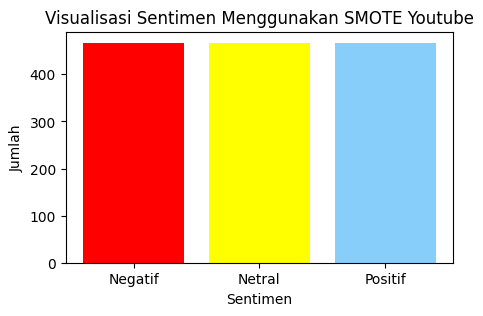

In [ ]:
sentimen_counts = y_train_resampled.value_counts()

plt.figure(figsize=(5, 3))
plt.bar(sentimen_counts.index, sentimen_counts.values, color=['red', 'yellow','lightskyblue'])
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Visualisasi Sentimen Menggunakan SMOTE Youtube')
plt.show()

# SVM Classification

In [ ]:
param_grid_svm = {
    'C':[1],
    'kernel': ['linear'],
    'class_weight': ['balanced'],
}

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.model_selection import StratifiedKFold

np.random.seed(30)
cv1 = StratifiedKFold(n_splits=10, shuffle=True, random_state=30)


svmModel = SVC()
svmModel_grid = GridSearchCV(estimator=svmModel, param_grid=param_grid_svm, cv=cv1)
svmModel_grid.fit(tf_idf, y)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=30, shuffle=True),
             estimator=SVC(),
             param_grid={'C': [1], 'class_weight': ['balanced'],
                         'kernel': ['linear']})

              precision    recall  f1-score   support

     Negatif       0.92      1.00      0.96        49
      Netral       0.98      0.91      0.94       118
     Positif       0.91      0.95      0.93       111

    accuracy                           0.94       278
   macro avg       0.94      0.95      0.95       278
weighted avg       0.94      0.94      0.94       278

Akurasi nya adalah : 94.24%
Precision nya adalah : 94.45%
Recall nya adalah : 94.24%
F1 Score nya adalah : 94.24%


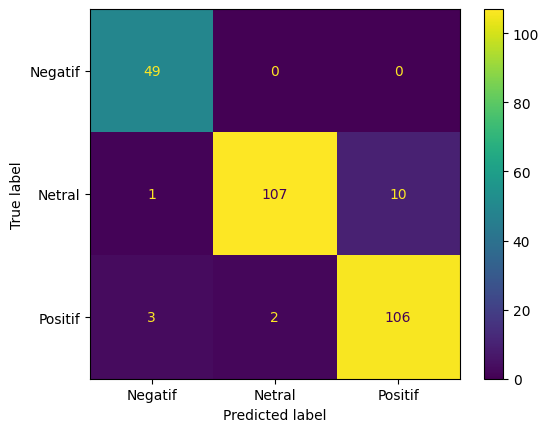

In [ ]:
from sklearn.metrics import classification_report , accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
y_pred = svmModel_grid.predict(X_test)
print(classification_report(y_test, y_pred))

print("Akurasi nya adalah : {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("Precision nya adalah : {:.2f}%".format(precision_score(y_test, y_pred, average='weighted') * 100))
print("Recall nya adalah : {:.2f}%".format(recall_score(y_test, y_pred, average='weighted')* 100) )
print("F1 Score nya adalah : {:.2f}%".format(f1_score(y_test, y_pred, average='weighted')* 100))


cm = confusion_matrix(y_test, y_pred)
Disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svmModel_grid.classes_)
Disp.plot()
plt.show()

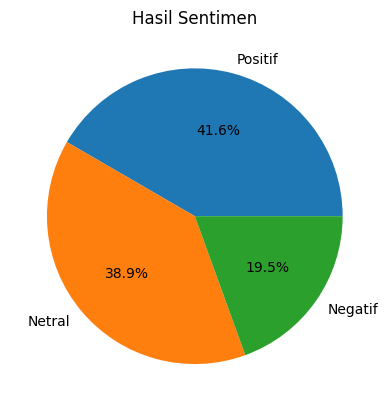

In [ ]:
import matplotlib.pyplot as plt

sentimen = data['sentimen'].value_counts()

plt.pie(sentimen, labels=sentimen.index, autopct='%1.1f%%')
plt.title('Hasil Sentimen')
plt.show()